# Onderzoek de data van je eigen station 

In [1]:
STATION = 15  # gvdveen

In [2]:
import sapphire
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
%matplotlib inline

In [3]:
data = sapphire.quick_download(STATION)

100%|###########################################################|Time:  0:00:00


Na enige tijd verschijnt hierboven een regel zoals:
"`100%|############################################################|Time:
0:00:06`"

Soms is de download zo snel dat deze regel niet wordt afgedrukt.

De
variabele "`data`" bevat nu een set meetgegevens. Deze set is af te drukken.

In [4]:
# Download data van een andere dag
# start = dt.datetime(2019, 3, 20)
# end = dt.datetime(2019, 3, 21)
# sapphire.download_data(data, '/s%d' % STATION, start, end)

In [5]:
print(data)

data9.h5 (File) ''
Last modif.: 'Tue Apr  2 14:22:20 2019'
Object Tree: 
/ (RootGroup) ''
/s15 (Group) ''
/s15/events (Table(11521,)) ''



Het "`data`" bestand heeft een hierarchise opbouw. In "`data`" zit een
RootGroup, deze is te benaderen met "`data.root`". Hierin zit weer een groep
"`s102`", deze is te benaderen met "`data.root.s102`". Hierin zit een tabel
"`events`".

## Werken met een events tabel
Voor het gemak maken we een variable
`events` die naar de eventstabel van het station wijst:

De tabel heeft een bepaalde plaats het HDF5 data bestand: `/s????/events` waarbij `????` staat voor het station nummer. Deze plaats heet een `node`:

In [6]:
node_naam = '/s%d/events' % STATION
node_naam

'/s15/events'

In [7]:
event_tabel = data.get_node(node_naam)
event_tabel

/s15/events (Table(11521,)) ''
  description := {
  "event_id": UInt32Col(shape=(), dflt=0, pos=0),
  "timestamp": Time32Col(shape=(), dflt=0, pos=1),
  "nanoseconds": UInt32Col(shape=(), dflt=0, pos=2),
  "ext_timestamp": UInt64Col(shape=(), dflt=0, pos=3),
  "pulseheights": Int16Col(shape=(4,), dflt=0, pos=4),
  "integrals": Int32Col(shape=(4,), dflt=0, pos=5),
  "n1": Float32Col(shape=(), dflt=0.0, pos=6),
  "n2": Float32Col(shape=(), dflt=0.0, pos=7),
  "n3": Float32Col(shape=(), dflt=0.0, pos=8),
  "n4": Float32Col(shape=(), dflt=0.0, pos=9),
  "t1": Float32Col(shape=(), dflt=0.0, pos=10),
  "t2": Float32Col(shape=(), dflt=0.0, pos=11),
  "t3": Float32Col(shape=(), dflt=0.0, pos=12),
  "t4": Float32Col(shape=(), dflt=0.0, pos=13),
  "t_trigger": Float32Col(shape=(), dflt=0.0, pos=14)}
  byteorder := 'little'
  chunkshape := (819,)

Dit is een tabel tienduizenden regels. Elke regel is een event.

De informatie van
het eerste event is op te halen met:

In [8]:
event_tabel[0]

(0, 1554076800, 476435616, 1554076800476435616, [500, 346,  -1,  -1], [6083, 4045,   -1,   -1],  3.13910007,  1.42200005, -1., -1.,  65.,  65., -1., -1.,  70.)

Het **tweede** event: (Let op, python telt vanaf 0 en niet vanaf 1)

In [9]:
event_tabel[1]

(1, 1554076801, 586415971, 1554076801586415971, [126, 295,  -1,  -1], [1360, 3402,   -1,   -1],  0.70181,  1.19589996, -1., -1.,  62.5,  65., -1., -1.,  67.5)

De informatie in een event bestaat uit een lijst getallen. Deze getallen hebben
de volgende betekenis:

1. event_id: Het unieke nummer van het event in deze
dataset.
1. timestamp: De tijd in hele seconden (GPS) waarop de trigger van het
event
plaatsvond.
1. nanoseconds: De tijd in nanoseconden waarop de trigger van
het event
plaatsvond.
1. ext_timestamp: Dit getal is vrij groot, namelijk de
twee vorige achter
elkaar.
1. pulseheights: Een array met pulshoogten, "`-1`"
betekent dat er geen detector
was.
1. integrals: Een array met pulsoppervlakten,
"`-1`" betekent ook hier dat er
geen detector was.
1. n1: Het aantal MIPS's
(Minimal Ionising Particles) dat in detector 1 is
gereconstrueerd.
1. n2
1. n3
1. n4
1. t1: De gereconstrueerde detectietijden vanaf het begin van het
opgeslagen
signaal voor detector 1.
1. t2
1. t3
1. t4
1. t_trigger: Het moment
van de GPS-tijdstempel vanaf het begin van het
opgeslagen signaal.

In het
werkblad [http://docs.hisparc.nl/infopakket/pdf/traces.pdf](http://docs.h
isparc.nl/infopakket/pdf/traces.pdf) wordt de natuurkundige betekenis van deze
getallen beschreven.  De afbeeldingen in dit werkblad zijn afkomstig uit het
interactieve werkblad [http://data.hisparc.nl/media/jsparc/jsparc.html](http://d
ata.hisparc.nl/media/jsparc/jsparc.html). Let op, computers tellen vanaf "`0`"
en niet vanaf "`1`"



### Werken met kolomnamen

Een kolom zoals 'event_id',
'timestamp' of 't1' kan opgevraagd worden door de
index van de kolom (0, 1, 2,
...) of door de kolomnaam. Door gebruik te maken
van de kolomnaam wordt de code
veel beter leesbaar:

In [10]:
first_event = event_tabel[0]
first_event['timestamp']

1554076800

Het aantal gereconstrueerde deeltjes in detector 1 (het zevende getal) bij het
eerste event is dus te vinden met:

In [11]:
event_tabel[0][6]  # 7de kolom van 1ste rij

3.1391001

en:

In [12]:
first_event = event_tabel[0]
first_event['n1']

3.1391001

De tweede code is weliswaar langer, maar veel beter leesbaar.

In [13]:
print(first_event['n1'])
print(event_tabel[0][6])

3.1391
3.1391


Een array met pulshoogten in ADC-waarden is in dit geval te vinden met:

In [14]:
first_event['pulseheights']

array([500, 346,  -1,  -1], dtype=int16)

Merk op dat de pulshoogtes van detector 3 en 4 de waarde '-1' hebben. De waarde
'-1' betekent dat de pulsehoogte niet bepaald kon worden; Station 102 heeft
slechts twee detectoren.

De eerste pulshoogte is te vinden met:

In [15]:
print("pulshoogte detector 1: %d ADC (eerste event)" % first_event['pulseheights'][0])

pulshoogte detector 1: 500 ADC (eerste event)


## Timestamps
Vaak is het eenvoudiger om een hele *kolom* bijvoorbeeld `timestamp` in
een keer te bekijken.

Eerst lezen we de hele tabel in het geheugen. Het object `events` is de gehele tabel:

In [16]:
events = event_tabel.read()

De variabele `ts` wijst naar de kolom `timestamp`
en we bekijken
de eerste 30 regels (events):

In [17]:
ts = events['timestamp']
ts[:30]

array([1554076800, 1554076801, 1554076805, 1554076810, 1554076813,
       1554076819, 1554076820, 1554076820, 1554076821, 1554076826,
       1554076831, 1554076831, 1554076832, 1554076832, 1554076832,
       1554076834, 1554076844, 1554076845, 1554076847, 1554076847,
       1554076849, 1554076858, 1554076859, 1554076865, 1554076866,
       1554076867, 1554076867, 1554076873, 1554076885, 1554076891], dtype=int32)

In [18]:
ns = events['nanoseconds']
ns[:30]

array([476435616, 586415971, 506642029, 178854403,  20738909, 344622890,
       494751937, 758892894, 734640328,  19998254, 121542592, 951893926,
       195791607, 793869533, 970626183, 999712064,  55689570, 211862397,
       277855239, 822414712, 892509712,  26203300, 746237039, 867268576,
       782428387, 375755296, 931431919, 174892773, 763649464,  75032702], dtype=uint32)

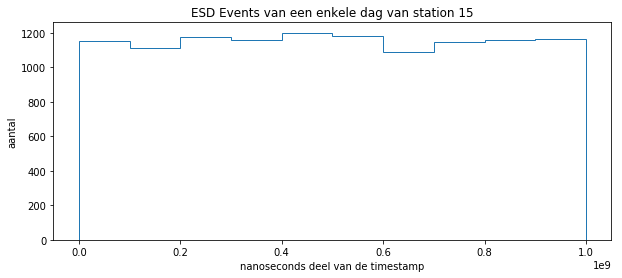

In [19]:
plt.figure(figsize=(10,4))
plt.hist(ns, histtype='step')
plt.ylabel('aantal')
plt.xlabel('nanoseconds deel van de timestamp')
plt.title('ESD Events van een enkele dag van station %d' % STATION)

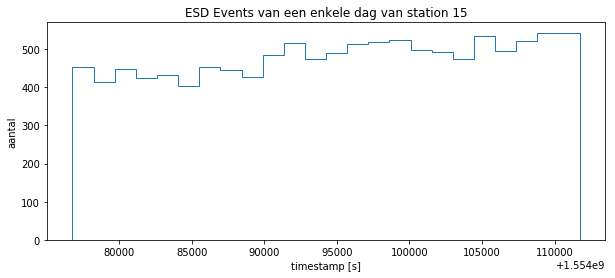

In [20]:
plt.figure(figsize=(10,4))
plt.hist(ts, bins=24, histtype='step')
plt.ylabel('aantal')
plt.xlabel('timestamp [s]')
plt.title('ESD Events van een enkele dag van station %d' % STATION)

In [21]:
eerste_ts = ts[0]
eerste_ts

1554076800

In [22]:
# linker en rechter grenzen van bins van 1 uur (3600 s) breed vanaf de eerste timestamp (1 dag)
bins = [eerste_ts + 3600 * h for h in range(25)]

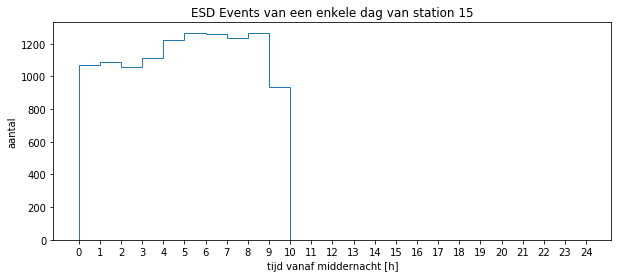

In [23]:
plt.figure(figsize=(10,4))
plt.hist(ts, bins=bins, histtype='step')
plt.ylabel('aantal')
plt.xlabel('tijd vanaf middernacht [h]')
plt.xticks(bins, range(25))
plt.title('ESD Events van een enkele dag van station %d' % STATION)

# MIPs

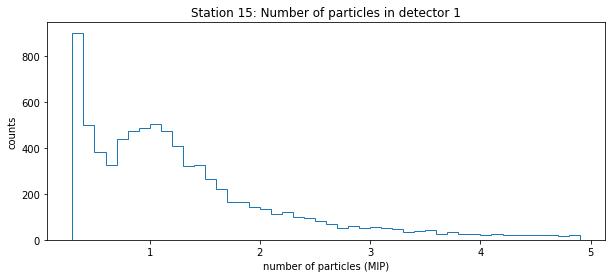

In [24]:
n1 = event_tabel.col('n1')
plt.figure(figsize=(10,4))
plt.hist(n1, bins=np.arange(0.3, 5., .1), histtype='step')
plt.title('Station %d: Number of particles in detector 1' % STATION)
plt.xlabel('number of particles (MIP)')
plt.ylabel('counts')

## Pulshoogte

Maak een histogram van de pulshoogtes van detector 1 en 2 van het station.

Een voorbeeld is hier te zien: http://data.hisparc.nl/show/stations/15

In [25]:
ph = event_tabel.col('pulseheights')
ph1 = ph[:, 0]
ph2 = ph[:, 1]

'pulseheights' is een *matrix*:
- `[:, 0]` is de gehele eerste rij, dwz de
pulshoogtes per event van detector 0
- `[:, 1]` is de gehele tweede rij, dwz de
pulshoogtes per event van detector 1

(10, 10000.0)

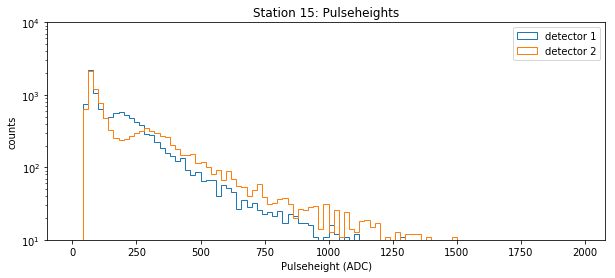

In [26]:
plt.figure(figsize=(10,4))
plt.hist(ph1, bins=np.arange(0, 2000., 20.), histtype='step', log=True)
plt.hist(ph2, bins=np.arange(0, 2000., 20.), histtype='step', log=True)
plt.title('Station %d: Pulseheights' % STATION)
plt.xlabel('Pulseheight (ADC)')
plt.ylabel('counts')
plt.legend(['detector 1', 'detector 2' ])
plt.ylim(10, 1e4)